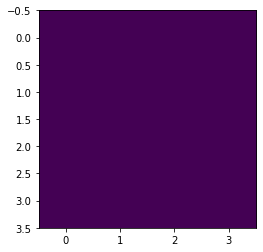

2

In [70]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np
plt.imshow(np.ones((4,4)))
plt.show()

from z_utils.utils_base_14 import *
from z_utils.utils_7343_01 import * 

import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 



class DatasetForTripletLoss:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        self.folder = []
        for folder_ in os.listdir(self.dir_name):
            self.folder.append(self.dir_name+folder_)
        self.l_=len(self.folder)
        self.indexes=np.array(range(self.l_))
        
    
    def __len__(self):
         
        return self.l_


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
         
        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 
        resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
         
        image_dims = np.expand_dims(resize_image, axis=2)
        if self.flag:
            print('file size:',np.array(image_dims).shape)
            plt.imshow(read_image)
            plt.show()
        return image_dims
    
        
    def __getitem__(self,idx):

        shuffle(self.indexes)
        #print(self.indexes)
        class_=np.zeros((1,self.l_))
        class_[0,self.indexes[0]]=1
        class_=class_[0,:]
        #print(class_)
        #Отсюда берем Anchor+Positive.
        folder_temp=[self.folder[i ] for i in self.indexes]
        #print(folder_temp[0]) 
        files_1 = self.photo_shuffle(str(folder_temp[0]))
        #print(self.indexes)
        #print(folder_temp[0])
        #print(class_) 
        #Отсюда берем Negative.
        files_2 = self.photo_shuffle(folder_temp[1])
         
        #Получаем путь к каждой фотографии из триплета и делаем ресайз.
        path_anchor = folder_temp[0] + '/' + files_1[0]
        #print(folder_temp[0])
        #print(files_1[0])
        
        
        #print('path_anchor:',path_anchor)
         
            
        anchor = self.resize(path_anchor)
        path_positive = folder_temp[0] + '/' + files_1[1]
        #print('path_positive:',path_positive)
         
            
        positive = self.resize(path_positive)
         
        path_negative =folder_temp[1] + '/' + files_2[0]
        if self.flag:
            print('path_negative:',path_negative)
        negative = self.resize(path_negative)
        #print(len(self.folder))

        return {'Anchor':anchor/255,
                'Positive':positive/255,
                'Negative':negative/255,
               'class_':class_}
###################################################
dataset1 = DatasetForTripletLoss('dog vs cat/dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=3)
l_=dataset1.l_
l_

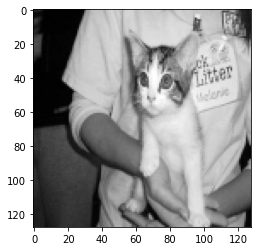

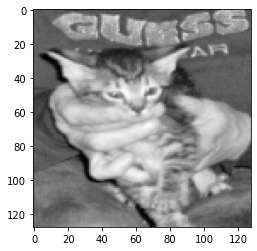

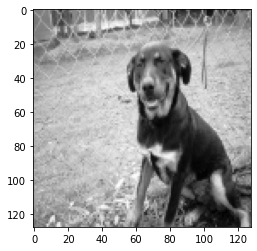

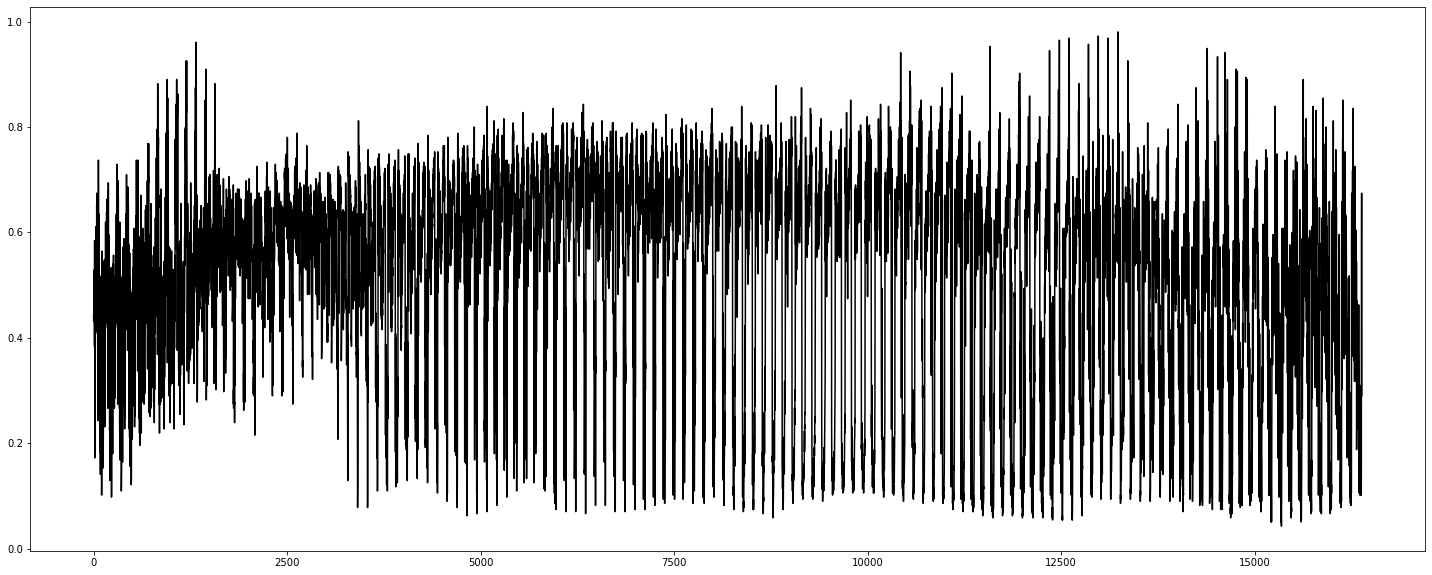

torch.Size([2, 2])


tensor([[1., 0.],
        [1., 0.]], dtype=torch.float64)

In [71]:
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
ai_2(Anchor[:,:,0])
Positive=batch['Positive'][0].numpy() 
ai_2(Positive[:,:,0])
Negative=batch['Negative'][0].numpy() 
ai_2(Negative[:,:,0])
plot_im(Negative[:,:,0])
class_=batch['class_'] 
print(class_.shape)
class_

In [72]:
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np
from onnx1 import *

import os

import cv2
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 



import matplotlib.pyplot as plt
import pickle
#import sys
import os
#import pathlib
import time
from z_utils.utils_base_14 import *
from z_utils.utils_mat_torch_003 import *
from z_utils.utils_7343_01 import *
from zz.Model_SRR_deep_YUV import model_SRR_03_1cannal_skotch
from zz.sketch2color_00 import N_sketch_2_color_00
 
from skimage.morphology import skeletonize, thin 
from enum import Enum
from torch import nn
import torch.optim as optim
from zz.gan_struct_04a import Layer_09, quasy_conv_00,quasy_conv_01_soft, conv_layer_downsample_01,Layer_01

from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Flatten
from torch.nn import LeakyReLU
from torch.nn import ReLU
from torch.nn import Dropout
from torch.nn import Conv2d
from torch.nn import ConvTranspose2d
from torch.nn import Softmax  
from torch.nn import MaxPool2d,AvgPool2d
from enum import Enum
from torch.nn import Conv2d
from torch.nn import ConvTranspose2d
from torch.nn import BatchNorm2d,BatchNorm1d
from torch import nn
#####################################################################3
from zz.layers import Layer
from zz.layers.Input import Input
from zz.layers.Lambda import Lambda
from zz.layers.Reshape import Reshape
from zz.layers.Flatten import Flatten
from zz.utils.torchsummary import summary as _summary
from zz.utils.WrappedDataLoader import WrappedDataLoader
from zz.utils.History import History
from zz.utils.Regularizer import Regularizer
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from zz.Convolution_uno_01   import conv_layer_universal_uno_04,conv_layer_universal_uno_05
from zz.layers.Layer_01 import Layer_01
from zz.gan_struct_04a import Layer_06
################################################3
################################################3

In [95]:
class conv_simple_features_00(Layer_06):
    def __init__(self,  device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_00, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2) #Штука для оптимизации параметров. Не очень понял
        _layer_conv_31 = Conv2d(1,4, kernel_size=(5, 5), #Конволюционный слой
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        self.add_module('conv00', _layer_conv_31) #Добавляет дочерний модуль к текущему модулю
        _layer_activation_1 = LeakyReLU(0.05) #Функция активации ЛикиРелу
        self.add_module('activation_LeakyReLU', _layer_activation_1) #Добавляем дочерний модуль к функции активации
        _layer_conv_32 = Conv2d(4,16, kernel_size=(5,5),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        
        self.add_module('conv01', _layer_conv_32) 
        _layer_conv_33 = Conv2d(16,22, kernel_size=(3,3),
                            stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
          
        
        self.add_module('conv02', _layer_conv_33) 
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2)) #двухмерное объединение к входному сигналу
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( )) #Сглаживаем ввод преобразовывая все в одномерный тензор.

        self.to(self.device)
        self.reset_parameters()
    
    
    #В форварде тут все выполняется
    def forward(self, scatch0):
        im_01_dwnsmpl=self.conv00(scatch0) #На вход подается видимо картинка с каким-то сайзингом
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
        im_02_dwnsmpl=self.conv01(im_01_dwnsmpl)
        im_02_dwnsmpl=self.activation_LeakyReLU(im_02_dwnsmpl)
        if self.show:
            print('im_02_dwnsmpl',im_02_dwnsmpl.shape)    
        im_03_dwnsmpl=self.conv02(im_02_dwnsmpl)
        im_03_dwnsmpl=self.Pool_00(im_03_dwnsmpl) 
        im_03_dwnsmpl=self.activation_LeakyReLU(im_03_dwnsmpl)
        if self.show:
            print('im_03_dwnsmpl',im_03_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_03_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00 
################################################3
class fully_connect_modul_264(Layer_06):
    def __init__(self,  device = None, L1 = 0., L2 = 0., numclasses=9, show=0):
        super(fully_connect_modul_264, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.numclasses =numclasses        
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(352, 256, bias = True) #Линейное преобразование. Не очень понял конкретно зачем
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5) #Обнуляет с вероятность 0.5 каждый элемент. Для ускорения
        _layer_batch_norm_3 = BatchNorm1d(256) #Что-то для ускорения. На вход подается количество элементов
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(256, 128, bias = True) #Линейное преобразование с 256-128
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(128,  self.numclasses, bias = True) #Линейное преобразование с 256-9
        self.add_module('D03', _layer_D03)
       
        
        _layer_SfTMax = Softmax(dim = -1) #Преобзование данных в диапазон от 0 до 1? Измерение -1 не очень понял
        self.add_module('SfTMax', _layer_SfTMax)  
        _layer_Sgmd = Sigmoid() #функция активации сигмоида для весов
        self.add_module('Sgmd', _layer_Sgmd)  
        #########################
        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, vect_00):
        vect_01=self.D01(vect_00)        
        vect_01=self.Dropout01(vect_01)
        vect_01=self.activation_LeakyReLU(vect_01)
        if self.show:
            print('vect_01',vect_01.shape) 
        vect_01=self.layer_batch_norm(vect_01)
        if self.show:
            print('vect_01 layer_batch_norm',vect_01.shape) 
        vect_02=self.D02(vect_01) 
        vect_02=self.activation_LeakyReLU(vect_02)
        if self.show:
            print('vect_02',vect_02.shape)    
        vect_03=self.D03(vect_02) 
        vect_03=self.SfTMax(vect_03) 
         
        if self.show:
            print('vect_03',vect_03.shape)         
        return vect_03
################################################3
class fully_connect_modul_265(Layer_06):
    def __init__(self,  device = None, L1 = 0., L2 = 0.,   show=0):
        super(fully_connect_modul_265, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
             
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(352, 256, bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(256)
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(256, 128, bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(128,  64, bias = True)
        self.add_module('D03', _layer_D03)
       
        
        
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
        #########################
        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, vect_00):
        vect_01=self.D01(vect_00)        
        vect_01=self.Dropout01(vect_01)
        vect_01=self.activation_LeakyReLU(vect_01)
        if self.show:
            print('vect_01',vect_01.shape) 
        vect_01=self.layer_batch_norm(vect_01)
        if self.show:
            print('vect_01 layer_batch_norm',vect_01.shape) 
        vect_02=self.D02(vect_01) 
        vect_02=self.activation_LeakyReLU(vect_02)
        if self.show:
            print('vect_02',vect_02.shape)    
        vect_03=self.D03(vect_02) 
        
         
        if self.show:
            print('vect_03',vect_03.shape)         
        return vect_03

#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class TL_003_mehanit_onnx(Layer_06):
    def __init__(self, imageSize,  last_activate, L1 = 0., L2 = 0.,device = None,numclasses=10,show=0 ):
        super(TL_003_mehanit_onnx, self).__init__( (imageSize[0],imageSize[1],1)   )    

        #self.class_name = str(self.__class__).split(".")[-1].split("'")[0]
        self.class_name = self.__class__.__name__
        self.last_activate = last_activate
        self.cannal_in= imageSize[2]
         
        self.imageSize = imageSize
        self.regularizer = Regularizer(L1, L2)
        self.show=show
        self.L1=L1
        self.L2=L2
        self.numclasses=numclasses 
        self.criterion_tml = torch.nn.TripletMarginLoss(margin=1.0, p=2)
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")

        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        ##############3
        self.conv2Dfeatures=conv_simple_features_00(device,L1 ,L2,show) 
        self.fully_connect_modul_0=fully_connect_modul_264(device,L1 ,L2,numclasses,show) 
        self.fully_connect_modul_TL=fully_connect_modul_265(device,L1 ,L2,show) 
         #######################
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(352, 256, bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(256)
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(256, 128, bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(128,  self.numclasses, bias = True)
        self.add_module('D03', _layer_D03)
        #########################
        
        _layer_SfTMax = Softmax(dim = -1)
        self.add_module('SfTMax', _layer_SfTMax)  
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
 
        self.to(self.device)
        
        self.reset_parameters()
    #####################################################
    def forward(self, scatch):
        class _type_input(Enum):
            is_torch_tensor = 0
            is_numpy = 1
            is_list = 2
        
           
        x_input = scatch
        
        _t_input = []
        _x_input = []
        #Проверка на тип данных
        for x in (x_input,x_input):
            if isinstance(x, (torch.Tensor)):
                _t_input.append(_type_input.is_torch_tensor)
                _x_input.append(x)
            elif isinstance(x, (np.ndarray)):
                _t_input.append(_type_input.is_numpy)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            elif isinstance(x, (list, tuple)):
                _t_input.append(_type_input.is_list)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            else:
                raise Exception('Invalid type input')

        _x_input = tuple(_x_input)
        _t_input = tuple(_t_input)

        scatch = self._contiguous(_x_input[0]) #Приводит в нормальный вид тензора с размером [2,128,128,1]
      
         
         
        ##############
        
            
        #Тут меняем местами каналы
        _layer_permut_channelfirst = Lambda(lambda x:  x.permute((0, 3, 1, 2)))
        _layer_permut_channellast = Lambda(lambda x:  x.permute((0, 2, 3, 1)))
        
        #Меняю местами каналы
        scatch0 = _layer_permut_channelfirst(scatch)
        #Применяю первый класс где много конвалюций
        vect_00=self.conv2Dfeatures(scatch0)
        #Применяю третий класс где линейные преобразования происходят
        vect_03=self.fully_connect_modul_TL(vect_00)    
        ################################# 
         
        ######################################
        #Бессмысленное первое присвоение, можно делать сразу второе
        x = vect_03
        x = self._contiguous(x)

        ###################    
        
        #Тут идет переприсовение которое зависит от изначальных типов данных которые подавались. Тут попадает в первый вариант
        if _type_input.is_torch_tensor in _t_input:
            pass
        elif _type_input.is_numpy in _t_input:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy()
            else:
                x = x.detach().numpy()
        else:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy().tolist()
            else:
                x = x.detach().numpy().tolist()

        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        
        #После всех преобразований на выход отдаем тензор размером [2,64]

        return x
     
    def _get_regularizer(self):
        return self.regularizer
#################################################################
###################################################################################################
    def loss_batch_02(self,dsrmn_model,  x,   opt=None):
#            def cross_entropy(pred, soft_targets):
#                return -torch.log(torch.mean(torch.sum(soft_targets * pred, 1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
#            def l2_norm_diff(pred, soft_targets):
#                return  torch.sqrt(torch.mean(torch.sum((soft_targets - pred )**2,-1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
        
        xb=(x[0],x[0]) 
        pred_ancor_0 = self.forward(x[0])
        xb=(x[1],x[1])
        pred_positive_0 = self.forward(x[1])
        xb=(x[2],x[2])
        pred_neg_0 = self.forward(x[2])
        #print('self._criterion',self._criterion)
        loss_0=self.criterion_tml (pred_ancor_0,pred_positive_0,pred_neg_0) #Не очень понял как конкретно работает TRIPLETMARGINLOSS
        loss_1=0#self.criterion_tml (pred_ancor_1,pred_positive_1,pred_neg_1)
            
            
            
             
            
             
         
        loss =1.0*loss_0+0.9*loss_1 
        
         
        #print(' loss', loss) #,end='')    
       
        #print(self.loss_vgg_1_bw(pred0, yb),self._criterion(pred0, yb),self.MSELoss( dscrm_tenzor,0*dscrm_tenzor))
         
        
        #loss+=  2.1*loss_mse 
        #loss = loss_func(pred0, yb)
        #loss = cross_entropy(pred, yb)

        #del(pred_ancor_0,pred_ancor_1,pred_positive_0,pred_positive_1,pred_neg_0,pred_neg_1) 

        #_, predicted = torch.max(pred.data, dim = 1)
        #_, ind_target = torch.max(yb, dim = 1)
        #correct = (predicted == ind_target).sum().item()
        #acc = correct / len(yb) #.size(0)

        _regularizer = self._get_regularizer()

        reg_loss = 0
        for param in self.parameters():
            reg_loss += _regularizer(param)

        loss += reg_loss

        if (opt is not None) :
            with torch.no_grad():

                opt.zero_grad()

                loss.backward()

                opt.step()

        self.count+=1
        if self.count  %3==0:
            print("*", end='')

        loss_item = loss.item()

        del loss
        del reg_loss
        
        return loss_item, 1#, acc
################################################################
    #####################################################
    def forward_eshar_00(self, scatch, im_wire):
        # skotch_N_global, Ref_global,sketch_ref
        class _type_input(Enum):
            is_torch_tensor = 0
            is_numpy = 1
            is_list = 2
        
           
        x_input = (scatch , im_wire)
        
        _t_input = []
        _x_input = []
        for x in x_input:
            if isinstance(x, (torch.Tensor)):
                _t_input.append(_type_input.is_torch_tensor)
                _x_input.append(x)
            elif isinstance(x, (np.ndarray)):
                _t_input.append(_type_input.is_numpy)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            elif isinstance(x, (list, tuple)):
                _t_input.append(_type_input.is_list)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            else:
                raise Exception('Invalid type input')

        _x_input = tuple(_x_input)
        _t_input = tuple(_t_input)

        scatch = self._contiguous(_x_input[0])
        im_wire = self._contiguous(_x_input[1])
         
         
        ##############
        
            
        
        _layer_permut_channelfirst = Lambda(lambda x:  x.permute((0, 3, 1, 2)))
        _layer_permut_channellast = Lambda(lambda x:  x.permute((0, 2, 3, 1)))

        scatch0 = _layer_permut_channelfirst(scatch)
        vect_00=self.conv2Dfeatures(scatch0)
        vect_03=self.fully_connect_modul_TL(vect_00)    
        ################################# 
         
        ######################################
        x = vect_03
        x = self._contiguous(x)

        ###################    

        if _type_input.is_torch_tensor in _t_input:
            pass
        elif _type_input.is_numpy in _t_input:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy()
            else:
                x = x.detach().numpy()
        else:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy().tolist()
            else:
                x = x.detach().numpy().tolist()

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return x,0
     
    def _get_regularizer(self):
        return self.regularizer

###################################################################
    def loss_batch_01(self,dsrmn_model, xb, yb,   opt=None):
#            def cross_entropy(pred, soft_targets):
#                return -torch.log(torch.mean(torch.sum(soft_targets * pred, 1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
#            def l2_norm_diff(pred, soft_targets):
#                return  torch.sqrt(torch.mean(torch.sum((soft_targets - pred )**2,-1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))

            
            
            
        print('xb.shape',xb[1].shape)
        pred = self(*xb)
        #print(pred)  
        Positive=xb[0][0].numpy() 
        #ai_2(Positive[:,:,0])
        #print(yb)        
        #print('999999999999999999999999999999999')    

        if isinstance(pred, tuple):
            pred0 = pred[0]
            del pred
        else:
            pred0 = pred
        loss=0
        
        #loss_mse= self._criterion(pred0, yb) 
        #print(pred0.shape)
        #print(yb.shape)
        MSELoss=nn.MSELoss(reduction='mean')    
        loss_mse= MSELoss(pred0, yb) #Создает критерий, который измеряет среднеквадратичную ошибку
         
        
        loss +=1.1*loss_mse 
       
        #print(self.loss_vgg_1_bw(pred0, yb),self._criterion(pred0, yb),self.MSELoss( dscrm_tenzor,0*dscrm_tenzor))
         
        
        #loss+=  2.1*loss_mse 
        #loss = loss_func(pred0, yb)
        #loss = cross_entropy(pred, yb)

        del pred0

        #_, predicted = torch.max(pred.data, dim = 1)
        #_, ind_target = torch.max(yb, dim = 1)
        #correct = (predicted == ind_target).sum().item()
        #acc = correct / len(yb) #.size(0)

        _regularizer = self._get_regularizer()

        reg_loss = 0
        for param in self.parameters():
            reg_loss += _regularizer(param)

        loss += reg_loss

        if (opt is not None)  :
            with torch.no_grad():

                opt.zero_grad()

                loss.backward()

                opt.step()

        self.count+=1
        if self.count  %3==0:
            print("*", end='')

        loss_item = loss.item()

        del loss
        del reg_loss

        return loss_item, len(yb)#, acc

    
################################################################
    def fit_dataloader_CLASS(self, dscrm_model,loader,   epochs = 1, validation_loader = None):
        #_criterion = nn.CrossEntropyLoss(reduction='mean')
        #_optimizer = optim.AdamW(self.parameters())
        #_optimizer = optim.Adam(self.parameters(), lr = 0.00001)#, eps=0.0)
        if (self._criterion is None): # or not isinstance(self._criterion, nn._Loss):
            raise Exception("Loss-function is not select!")

        if (self._optimizer is None) or not isinstance(self._optimizer, optim.Optimizer):
            raise Exception("Optimizer is not select!")

#        _criterion = nn.MSELoss(reduction='mean')
#        _optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.2)


         
            
            
        history = History()
        self.count=0
        for epoch in range(epochs):
            self._optimizer.zero_grad()
            
            print("Epoch {0}/{1}".format(epoch, epochs), end='')
            
            self.train()
            ########################################3
             
            
            ### train mode ###
            print("[", end='')
            losses=[]
            nums=[]
            for s in loader:
                
 
                
                train_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['class_'].numpy()).to(self.device)  
                                        )
                
                 
                
                 
                
                images_Anchor=train_ds.tensors[0] 
                 
                class_=train_ds.tensors[1]
                 

                
                
                

                losses_, nums_   =   self.loss_batch_01(dscrm_model, \
                                                   (images_Anchor ,images_Anchor ),\
                                                    class_,  self._optimizer)                                                                                                       


                losses.append(losses_)
                nums.append(nums_ )
                 
                
            print("]", end='')


            sum_nums = np.sum(nums)
            loss = np.sum(np.multiply(losses, nums)) / sum_nums
            ######################################
             
            ### test mode ###
            if validation_loader is not None:
                 


                self.eval()
                
                 
                print("[", end='')
                losses=[]
                nums=[]
                for s in validation_loader:
                #s = next(iter(loader))
                
                    val_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['class_'].numpy()).to(self.device)  
 
                                        )
                

                    images_Anchor=val_ds.tensors[0] 

                    class_=val_ds.tensors[1]
                     
                
                 
                
                     
                
                

  
                      
                    
                                                                                                                         

                    losses_, nums_   =  \
                    self.loss_batch_01( dscrm_model,\
                           (images_Anchor ,images_Anchor ),\
                           class_, self._optimizer)      

                    losses.append(losses_)
                    nums.append(nums_ )
                print("]", end='')


                sum_nums = np.sum(nums)
                val_loss = np.sum(np.multiply(losses, nums)) / sum_nums
                    #acc = np.sum(np.multiply(accs, nums)) / sum_nums
                #################################################
                history.add_epoch_values(epoch, {'loss': loss, 'val_loss': val_loss})
                
                print(' - Loss: {:.6f}'.format(loss), end='')
                print(' - Test-loss: {:.6f}'.format(val_loss), end='')
            else:
                history.add_epoch_values(epoch, {'loss': loss })
                print(' - Loss: {:.6f}'.format(loss), end='')
                
            print("")
            
 
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return history
################################################################
    def fit_dataloader_TL(self, dscrm_model,loader,   epochs = 1, validation_loader = None):
        #_criterion = nn.CrossEntropyLoss(reduction='mean')
        #_optimizer = optim.AdamW(self.parameters())
        #_optimizer = optim.Adam(self.parameters(), lr = 0.00001)#, eps=0.0)
        if (self._criterion is None): # or not isinstance(self._criterion, nn._Loss):
            raise Exception("Loss-function is not select!")

        if (self._optimizer is None) or not isinstance(self._optimizer, optim.Optimizer):
            raise Exception("Optimizer is not select!")

#        _criterion = nn.MSELoss(reduction='mean')
#        _optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.2)


         
            
            
        history = History()
        self.count=0
        for epoch in range(epochs):
            self._optimizer.zero_grad()
            
            print("Epoch {0}/{1}".format(epoch, epochs), end='')
            
            self.train()
            ########################################3
             
            
            ### train mode ###
            print("[", end='')
            losses=[]
            nums=[]
            for s in loader:
                
 
                
                train_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['Positive'].numpy()).to(self.device) ,
                                        torch.FloatTensor(s['Negative'].numpy()).to(self.device) 
                                        
                                        )
                
                 
                
                 
                
                images_Anchor=train_ds.tensors[0] 
                 
                images_Positive=train_ds.tensors[1]
                images_Negative=train_ds.tensors[2]

                
                
                

                losses_, nums_   =   self.loss_batch_02(dscrm_model, \
                                                   (images_Anchor ,images_Positive,images_Negative ),\
                                                      self._optimizer)                                                                                                       


                losses.append(losses_)
                nums.append(nums_ )
                 
                
            print("]", end='')


            sum_nums = np.sum(nums)
            loss = np.sum(np.multiply(losses, nums)) / sum_nums
            ######################################
             
            ### test mode ###
            if validation_loader is not None:
                 


                self.eval()
                
                 
                print("[", end='')
                losses=[]
                nums=[]
                for s in validation_loader:
                #s = next(iter(loader))
                
                    val_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['Positive'].numpy()).to(self.device) ,
                                        torch.FloatTensor(s['Negative'].numpy()).to(self.device) 
                                        
                                        )
                

                    images_Anchor=val_ds.tensors[0] 

                    images_Positive=val_ds.tensors[1]
                    images_Negative=val_ds.tensors[2]
                
                 
                
                     
                
                

  
                      
                    
                                                                                                                         

                    losses_, nums_   =  \
                    self.loss_batch_00( dscrm_model,\
                           (images_Anchor ,images_Positive,images_Negative ),\
                            self._optimizer)      

                    losses.append(losses_)
                    nums.append(nums_ )
                print("]", end='')


                sum_nums = np.sum(nums)
                val_loss = np.sum(np.multiply(losses, nums)) / sum_nums
                    #acc = np.sum(np.multiply(accs, nums)) / sum_nums
                #################################################
                history.add_epoch_values(epoch, {'loss': loss, 'val_loss': val_loss})
                
                print(' - Loss: {:.6f}'.format(loss), end='')
                print(' - Test-loss: {:.6f}'.format(val_loss), end='')
            else:
                history.add_epoch_values(epoch, {'loss': loss })
                print(' - Loss: {:.6f}'.format(loss), end='')
                
            print("")
            
 
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return history

In [96]:
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cpu',numclasses=670 ,show=0)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0011, momentum=0.5)
TL_001.show=0 
min_loss=10
for gn in range(1000):
    H =TL_001.fit_dataloader_TL(  \
                None,loader=dataloader,   epochs = 1000, validation_loader = None)
    plt.figure(figsize=(5,5))
    plt.plot(H.history['loss'], label='training loss')
    #plt.plot(H.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()
    loss_=H.history['loss'][-1]
    if loss_<min_loss:
        TL_001.conv2Dfeatures.save_state('conv2Dfeatures00.pt')
        TL_001.fully_connect_modul_0.save_state('fully_connect_modul00.pt')         
         
        print("loss:  ",loss_)
        min_loss=loss_
        

Epoch 0/1000[] - Loss: 0.963469
Epoch 1/1000[] - Loss: 0.992860
Epoch 2/1000[*] - Loss: 0.982011
Epoch 3/1000[] - Loss: 1.028627
Epoch 4/1000[] - Loss: 1.005357
Epoch 5/1000[*] - Loss: 0.986199
Epoch 6/1000[] - Loss: 1.010043
Epoch 7/1000[] - Loss: 1.001338
Epoch 8/1000[*] - Loss: 1.015593
Epoch 9/1000[] - Loss: 0.991992
Epoch 10/1000[] - Loss: 1.009927
Epoch 11/1000[*] - Loss: 0.992246
Epoch 12/1000[] - Loss: 1.014601
Epoch 13/1000[] - Loss: 0.996176
Epoch 14/1000[*] - Loss: 1.012802
Epoch 15/1000[] - Loss: 1.016993
Epoch 16/1000[] - Loss: 1.028718
Epoch 17/1000[*] - Loss: 1.015496
Epoch 18/1000[] - Loss: 1.005404
Epoch 19/1000[] - Loss: 0.969640
Epoch 20/1000[*] - Loss: 0.974810
Epoch 21/1000[] - Loss: 1.010510
Epoch 22/1000[] - Loss: 1.007322
Epoch 23/1000[*] - Loss: 1.031291
Epoch 24/1000[] - Loss: 0.945022
Epoch 25/1000[] - Loss: 1.009468
Epoch 26/1000[*] - Loss: 1.017766
Epoch 27/1000[] - Loss: 0.991043
Epoch 28/1000[] - Loss: 1.012524
Epoch 29/1000[*] - Loss: 0.993873
Epoch 30/1

KeyboardInterrupt: 

In [76]:
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cpu',numclasses=670 ,show=0)
 
TL_001.compile(criterion='000', optimizer='adam', lr=0.0011, momentum=0.5)
TL_001.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 32, 32]             104
         LeakyReLU-2            [-1, 4, 32, 32]               0
            Conv2d-3             [-1, 16, 8, 8]           1,616
         LeakyReLU-4             [-1, 16, 8, 8]               0
            Conv2d-5             [-1, 22, 8, 8]           3,190
         MaxPool2d-6             [-1, 22, 4, 4]               0
         LeakyReLU-7             [-1, 22, 4, 4]               0
           Flatten-8                  [-1, 352]               0
conv_simple_features_00-9                  [-1, 352]               0
           Linear-10                  [-1, 256]          90,368
          Dropout-11                  [-1, 256]               0
        LeakyReLU-12                  [-1, 256]               0
      BatchNorm1d-13                  [-1, 256]             512
           Linear-14              

In [13]:
######################################
#from DiffuseMap_03b import *
IMAGE_SIZE = [128, 128, 1] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cpu',numclasses=670 ,show=0)

TL_001.conv2Dfeatures.load_state('conv2Dfeatures04.pt')
TL_001.fully_connect_modul_0.load_state('fully_connect_modul04.pt')         
TL_001.fully_connect_modul_TL.load_state('fully_connect_modul_TL_04.pt')         
#######


Loading preset weights... Fail! [Errno 2] No such file or directory: 'conv2Dfeatures04.pt'
[Action]: Reseting to random values!

Loading preset weights... Fail! [Errno 2] No such file or directory: 'fully_connect_modul04.pt'
[Action]: Reseting to random values!

Loading preset weights... Fail! [Errno 2] No such file or directory: 'fully_connect_modul_TL_04.pt'
[Action]: Reseting to random values!


In [25]:
im = np.expand_dims(resize('test/1000.jpg'),0)
im.shape

(1, 128, 128, 1)

In [26]:
TL_001.eval()
TL_001.forward(im)

array([[ 0.83378935, -1.7313656 ,  0.97099924,  0.35577345, -0.8123244 ,
         0.7427624 , -0.1118753 ,  1.419706  ,  0.33110735,  2.111747  ,
         1.7316674 ,  0.6311197 , -1.4470496 , -0.4124527 , -1.3304124 ,
         0.157992  ,  2.1160939 , -1.0186777 , -0.00499617,  0.5254518 ,
        -0.08201496,  1.174205  , -0.08335625, -0.45413488,  1.3502662 ,
         2.00027   , -0.6860363 , -1.2502449 , -0.77918273,  0.10626437,
        -0.17604929, -0.28023157,  0.78639936, -0.96663314, -0.25876153,
         1.0345687 ,  0.90125334, -0.12163695,  0.29197535, -1.187147  ,
         0.42804784, -0.11927428, -0.4903878 , -0.19574943, -1.3841686 ,
         2.2772772 , -0.04237171,  3.2458415 ,  0.4101629 ,  1.1224278 ,
        -0.7329112 ,  0.85389763,  1.0796156 ,  0.41011453, -0.48651248,
         0.35534945,  1.0595276 ,  1.7762328 , -0.6484624 , -0.17006455,
         0.35265434,  0.90103495,  2.2325475 , -1.0753523 ]],
      dtype=float32)

In [28]:
dummy_input = torch.randn(1, 128, 128,1, requires_grad=True)
create_onnx(TL_001,dummy_input,"TL_001.onnx")

In [31]:
load_onnx('TL_001.onnx','test/1000.jpg')

[[ 0.83378893 -1.7313658   0.97099847  0.3557729  -0.8123252   0.7427623
  -0.11187487  1.4197063   0.33110765  2.1117475   1.7316678   0.63112
  -1.4470497  -0.4124534  -1.3304131   0.15799233  2.1160944  -1.0186781
  -0.00499643  0.5254519  -0.08201527  1.174205   -0.08335635 -0.45413473
   1.3502661   2.0002701  -0.6860362  -1.250245   -0.77918315  0.10626456
  -0.17604968 -0.28023192  0.78639966 -0.9666332  -0.2587619   1.0345687
   0.90125364 -0.12163719  0.2919758  -1.1871469   0.4280479  -0.11927456
  -0.4903877  -0.19574949 -1.3841695   2.2772768  -0.04237161  3.2458405
   0.41016302  1.1224284  -0.7329112   0.853898    1.0796154   0.41011465
  -0.48651195  0.35534927  1.0595276   1.7762334  -0.64846224 -0.1700647
   0.35265505  0.9010354   2.2325473  -1.0753517 ]]
